# IMPORT LIBRARY / MODULE

In [2]:
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt
import seaborn as sns

# IMPORT DATA

In [3]:
dataset = pd.read_csv('cardio_train.csv' , sep=';')
dataset.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [5]:
dataset.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


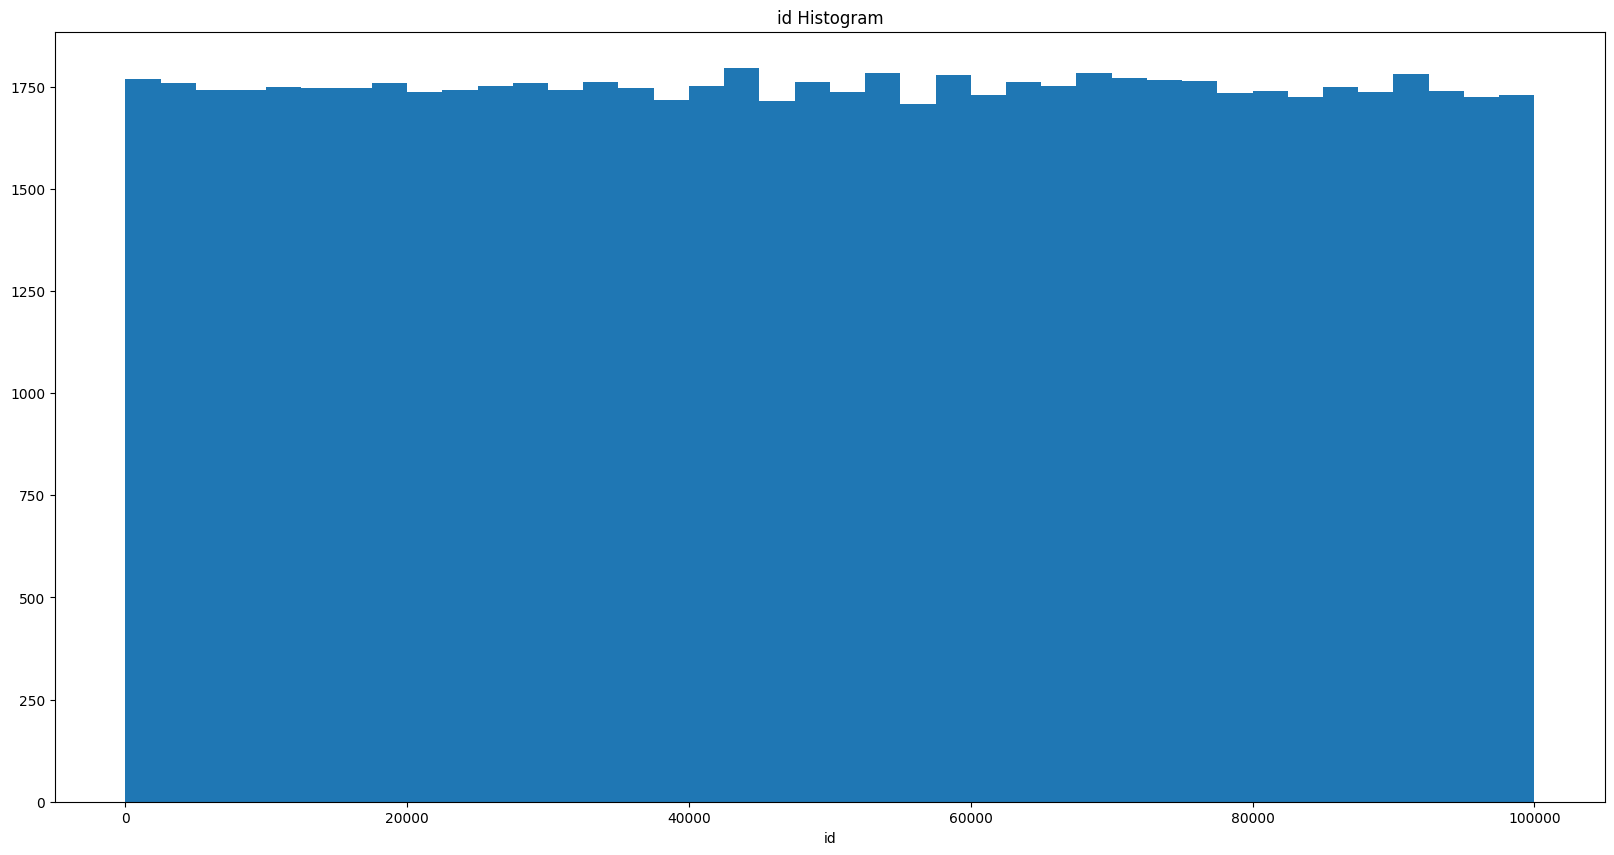

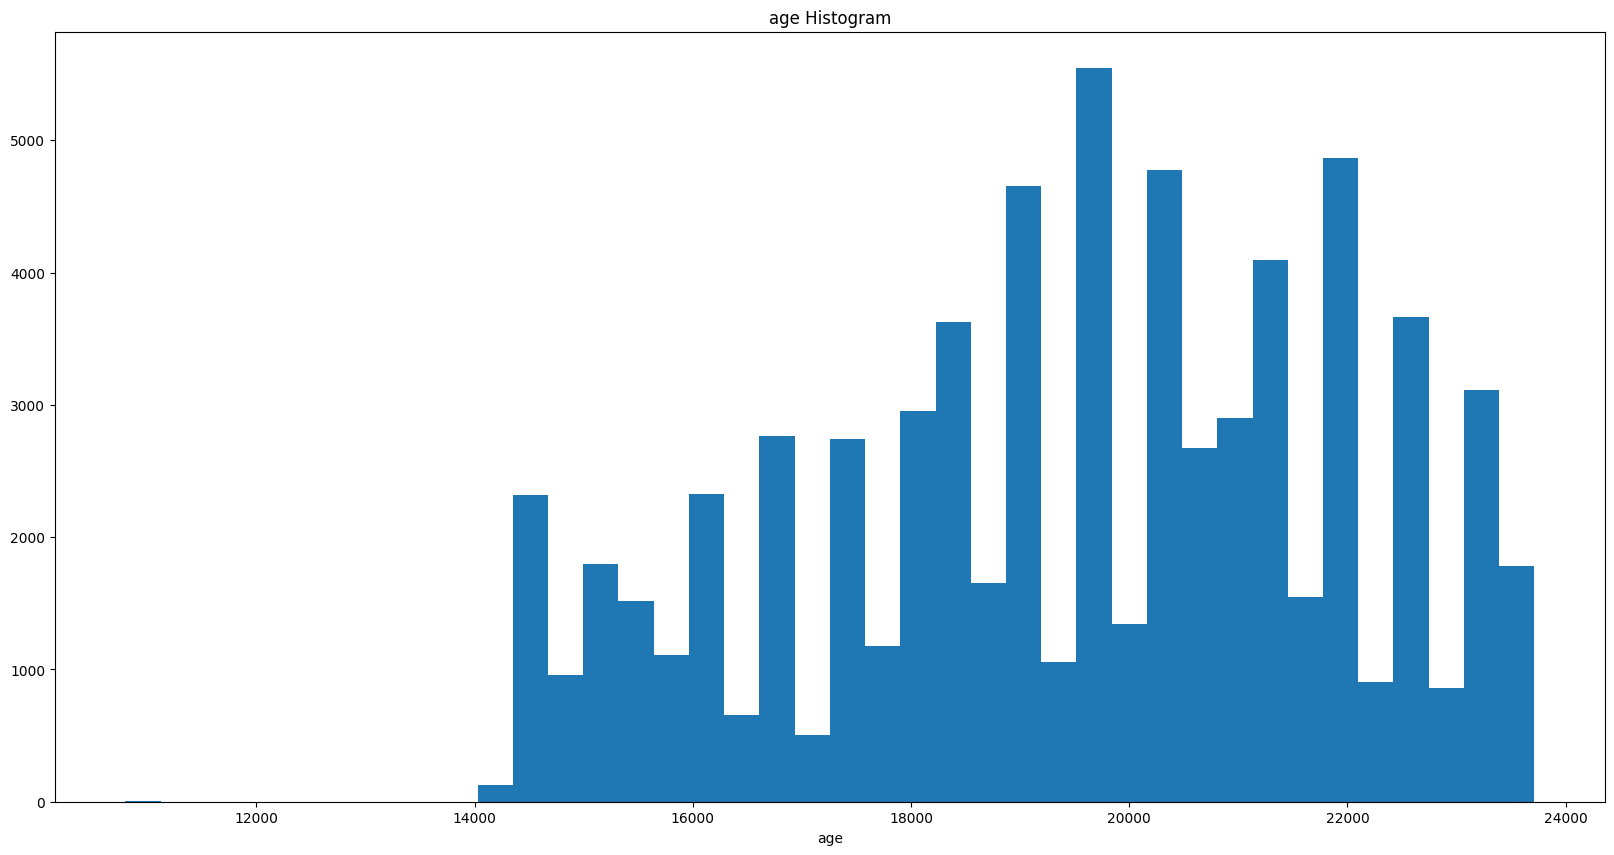

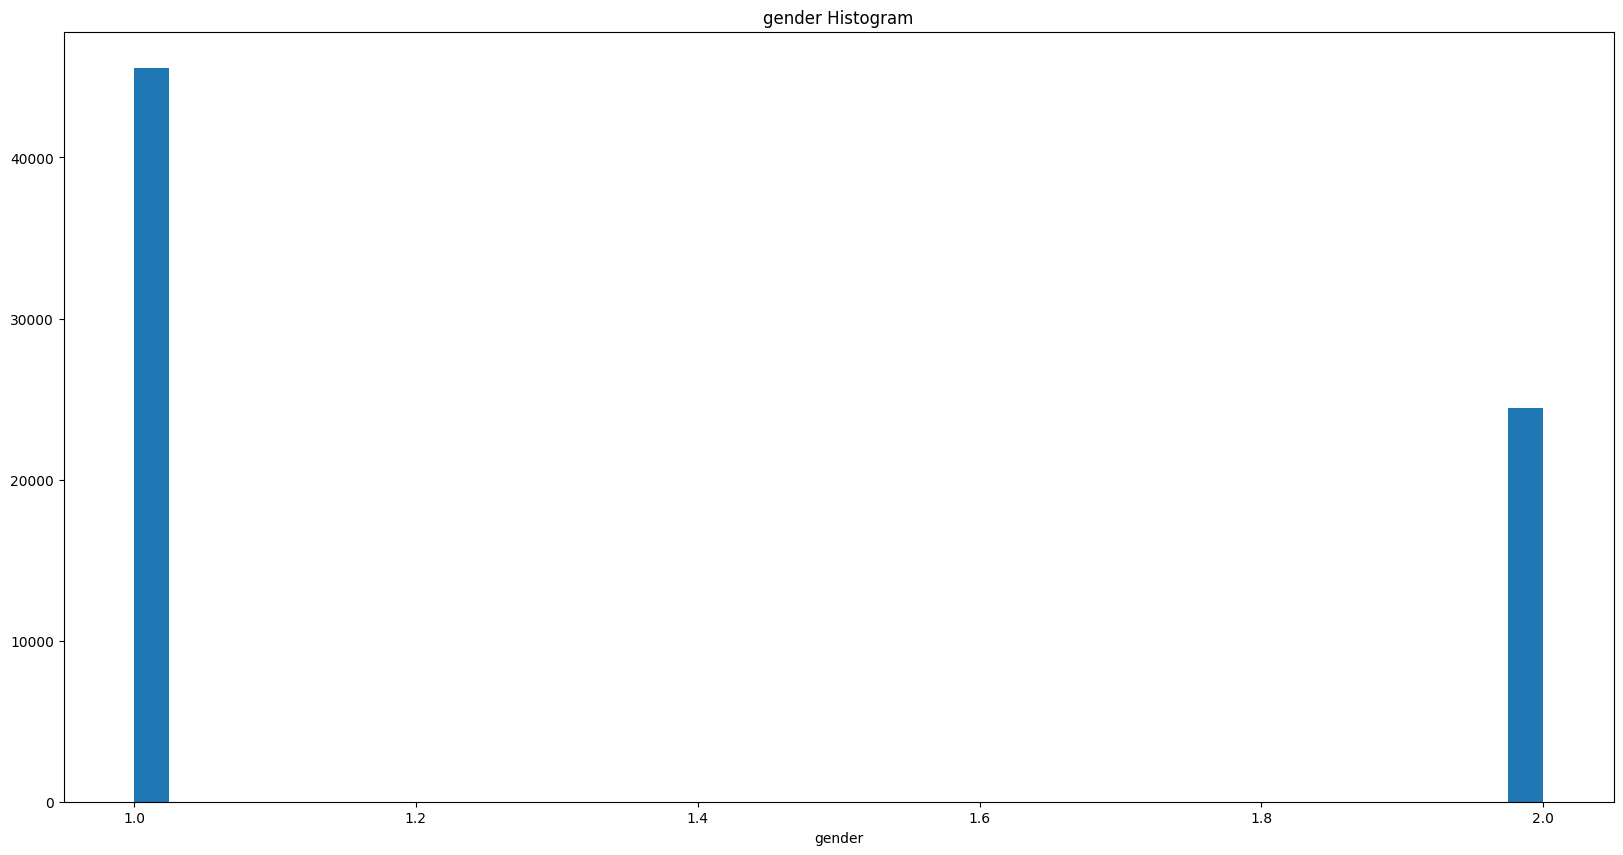

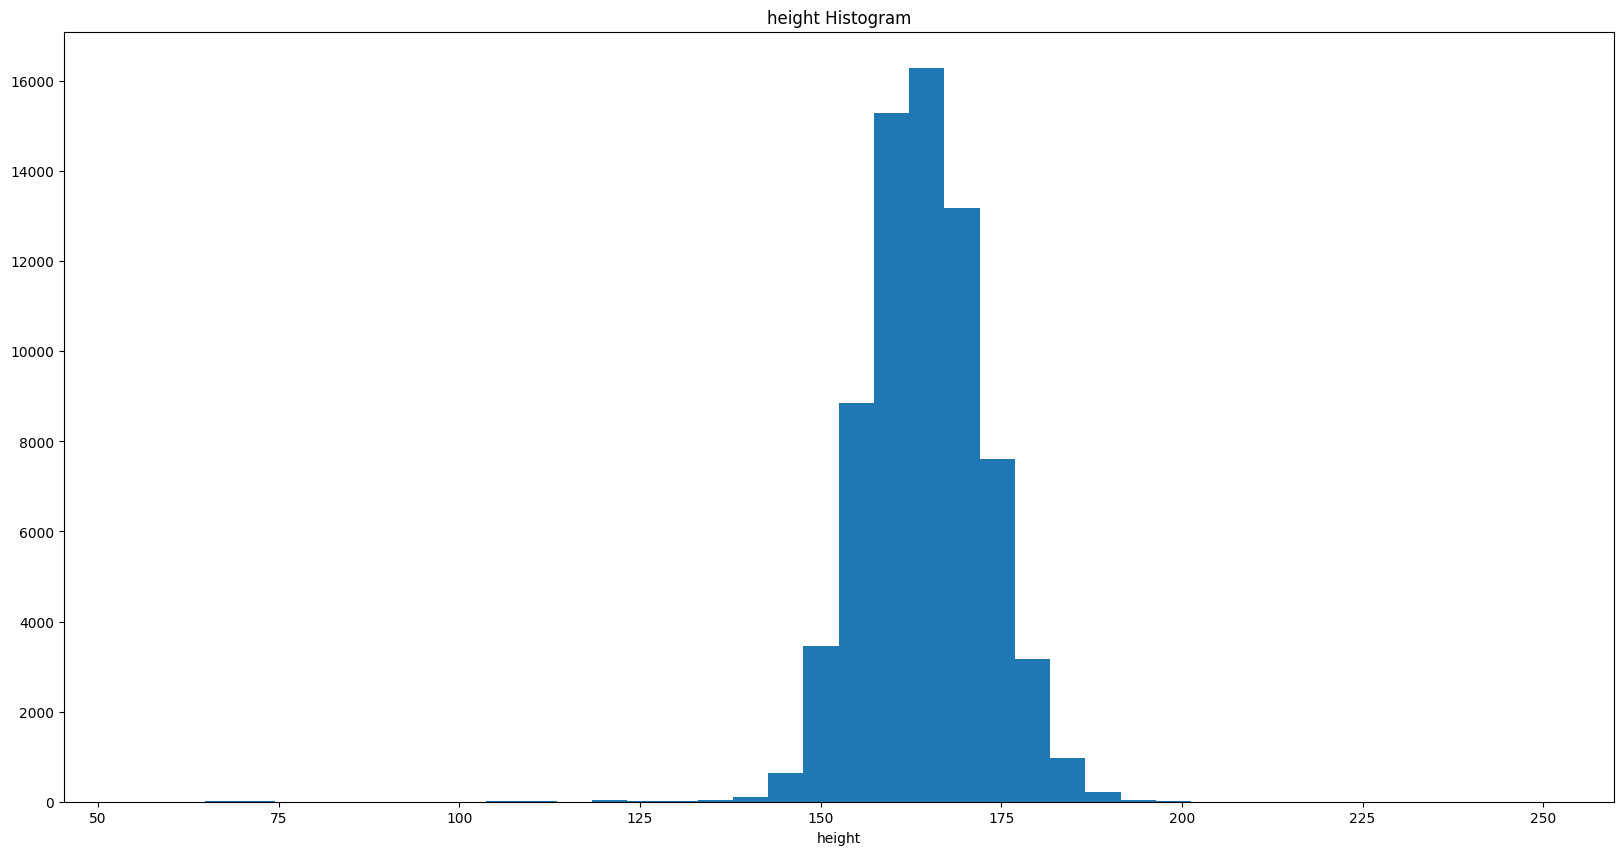

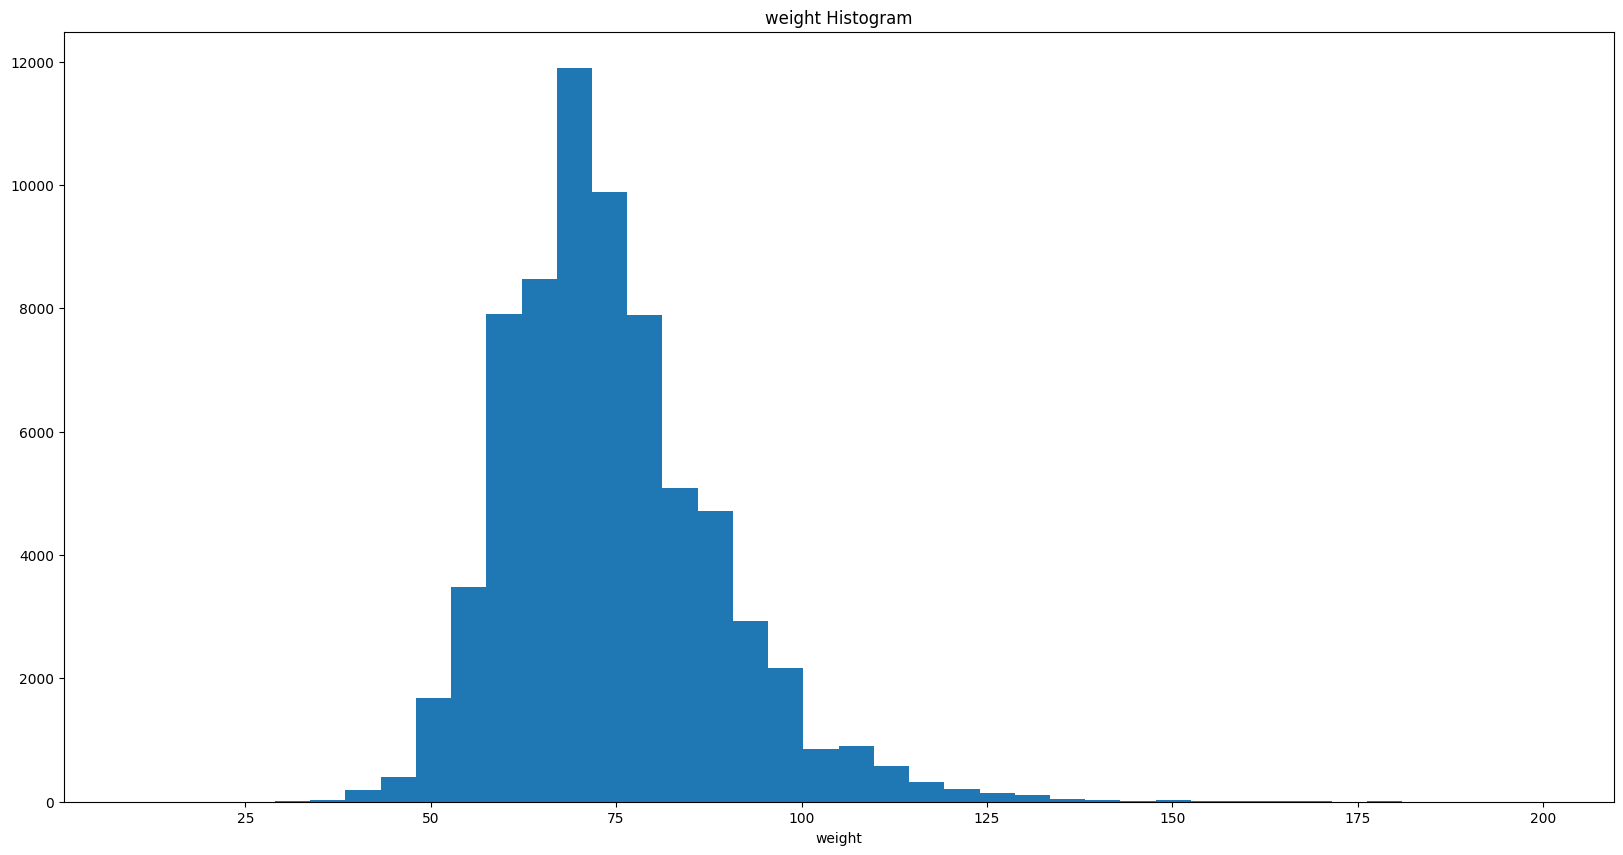

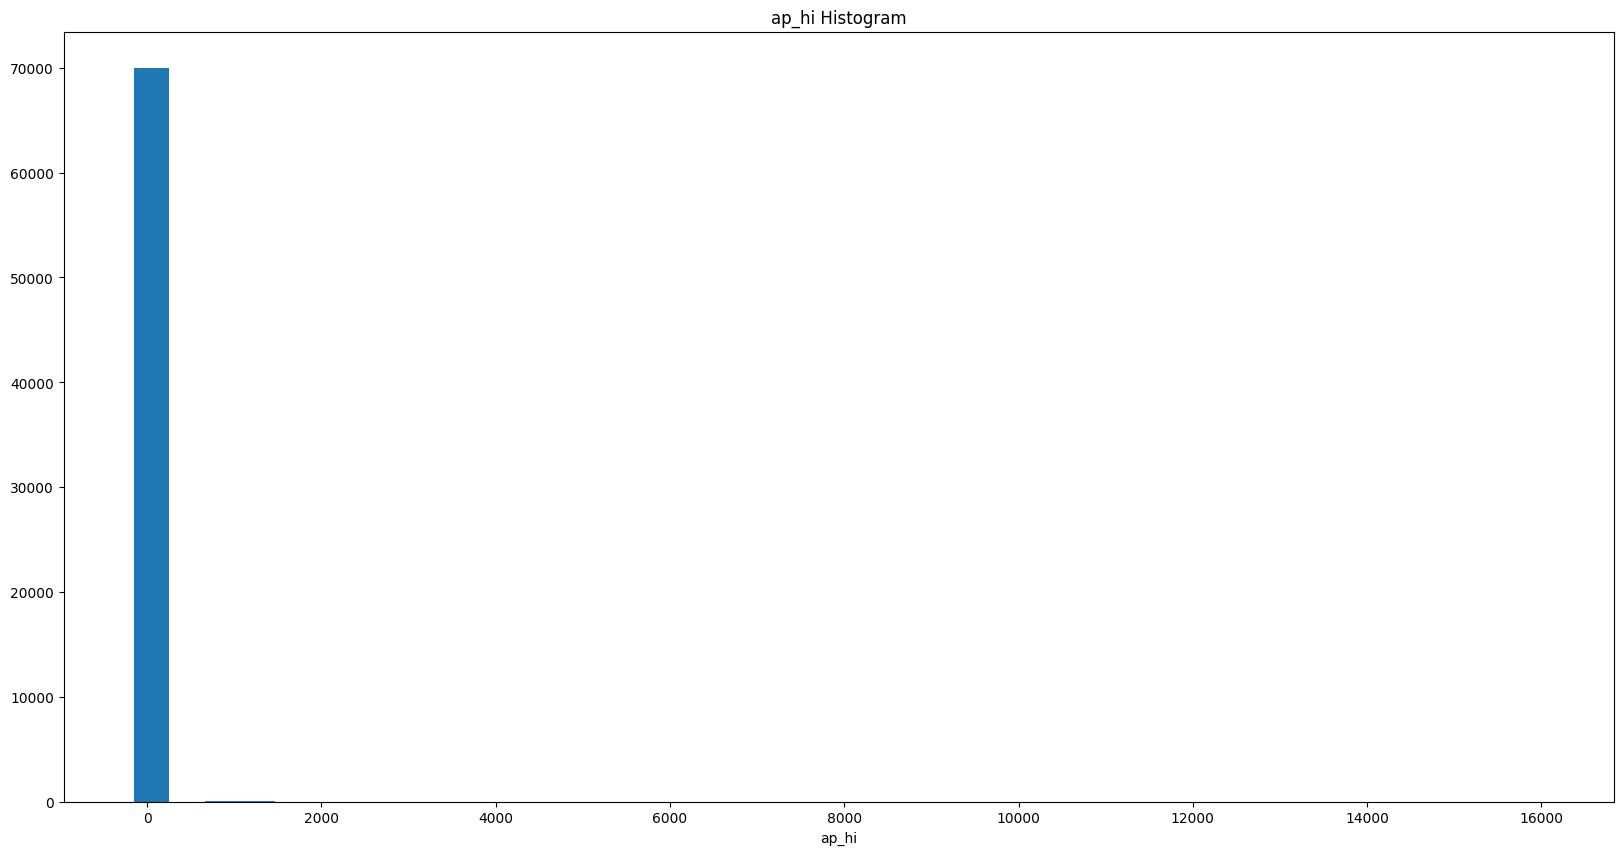

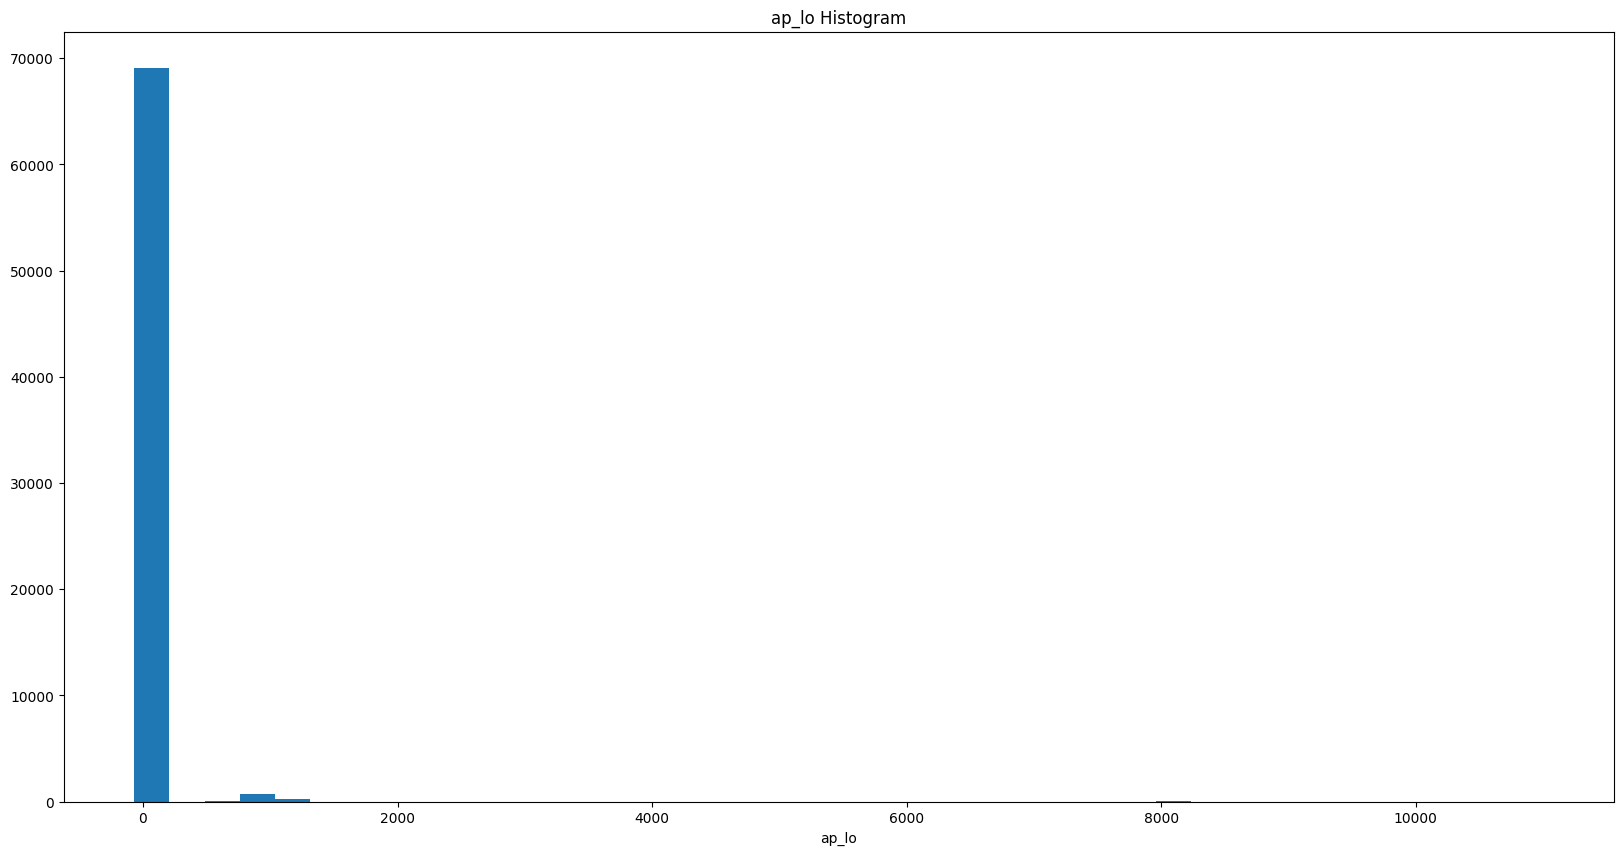

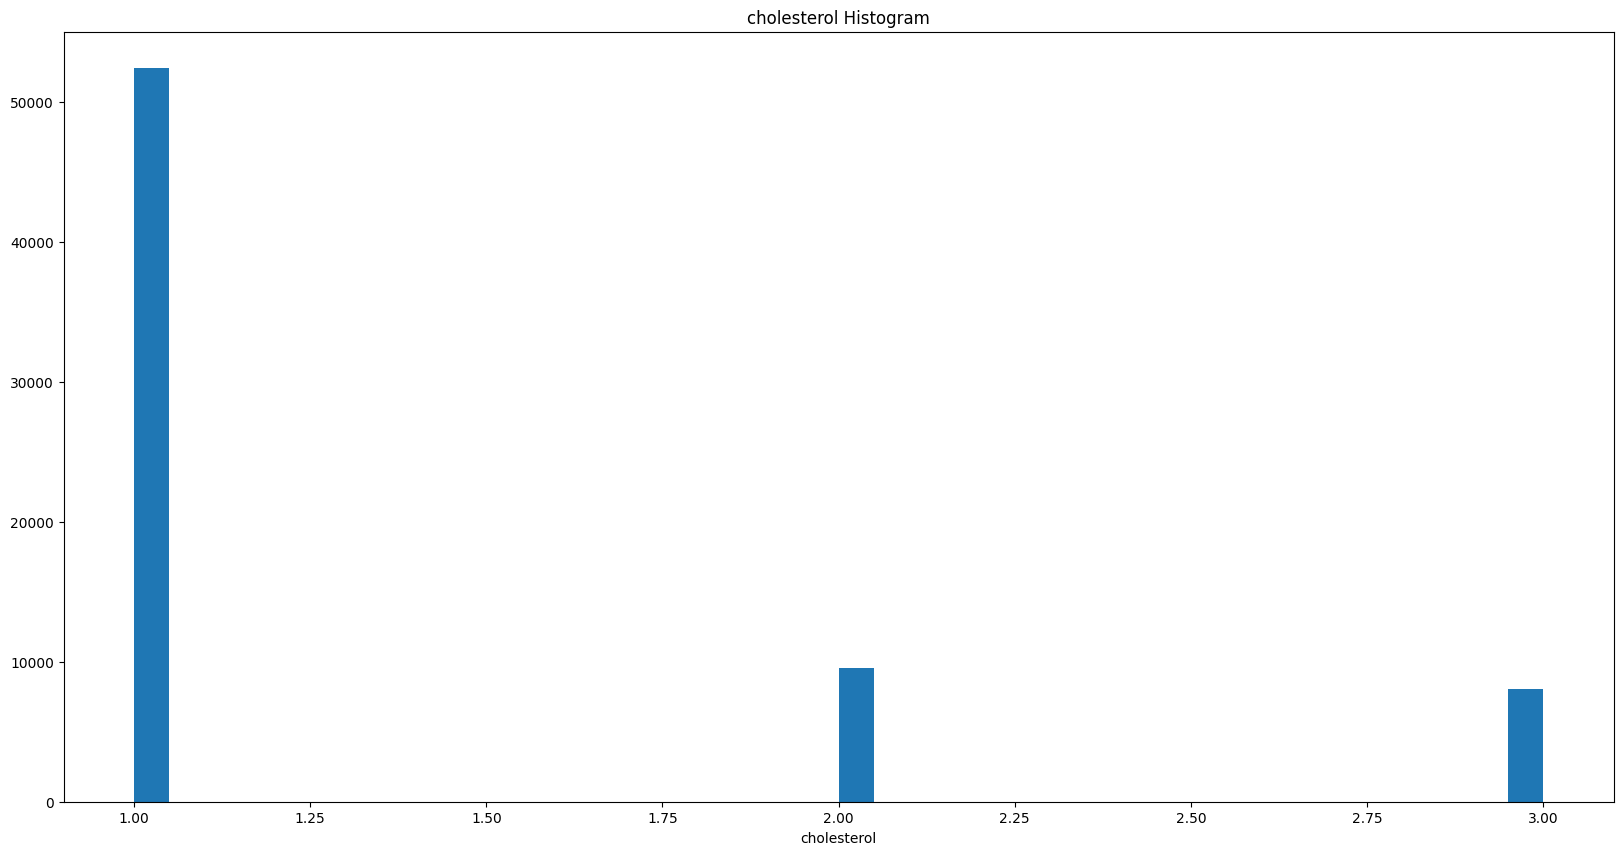

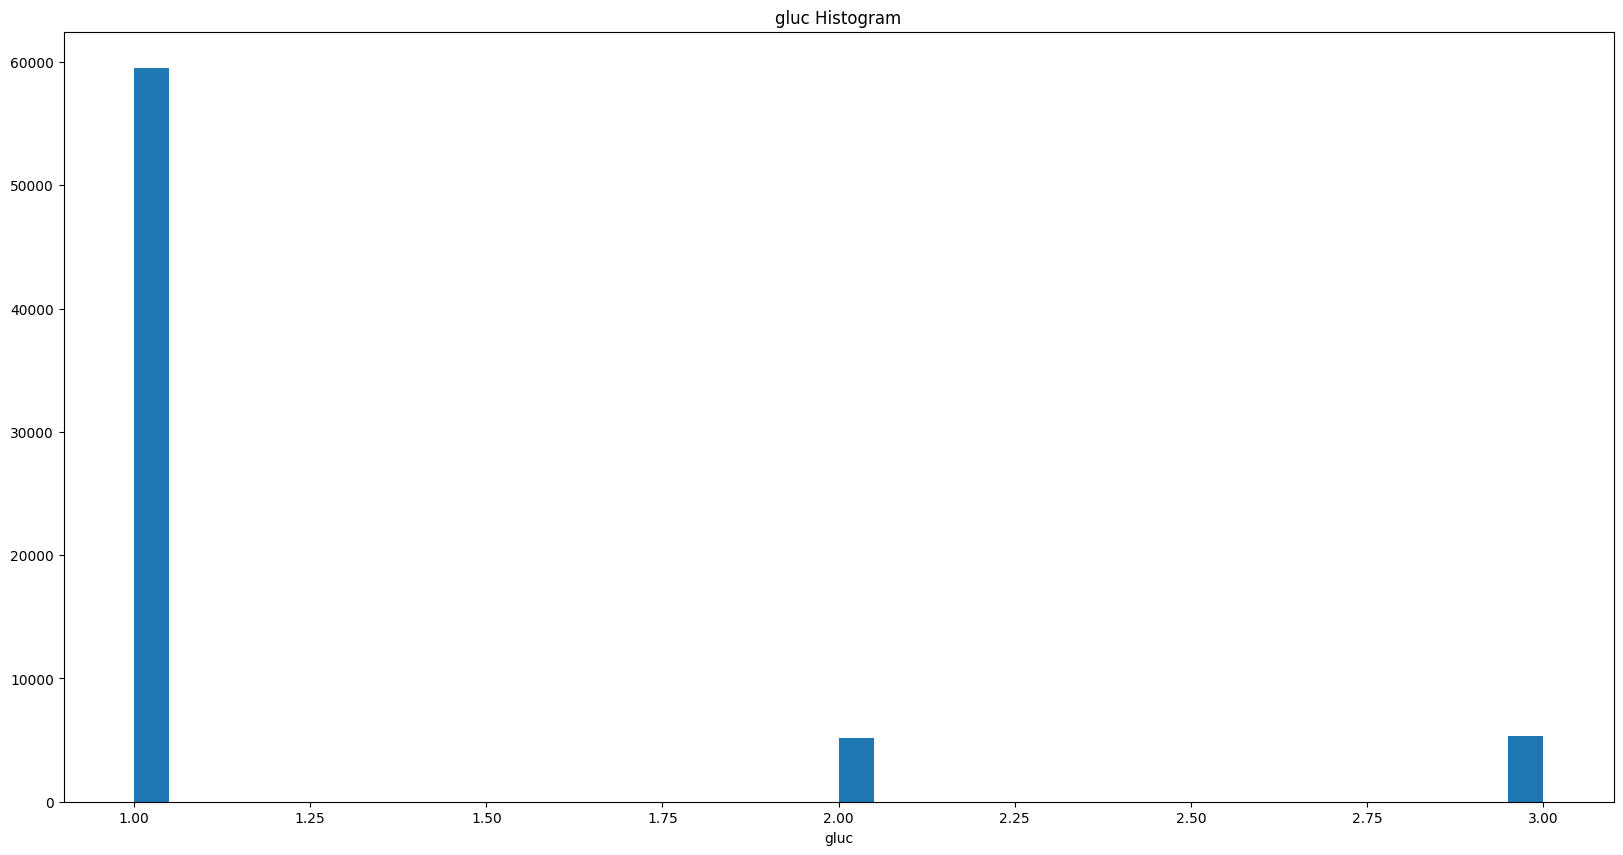

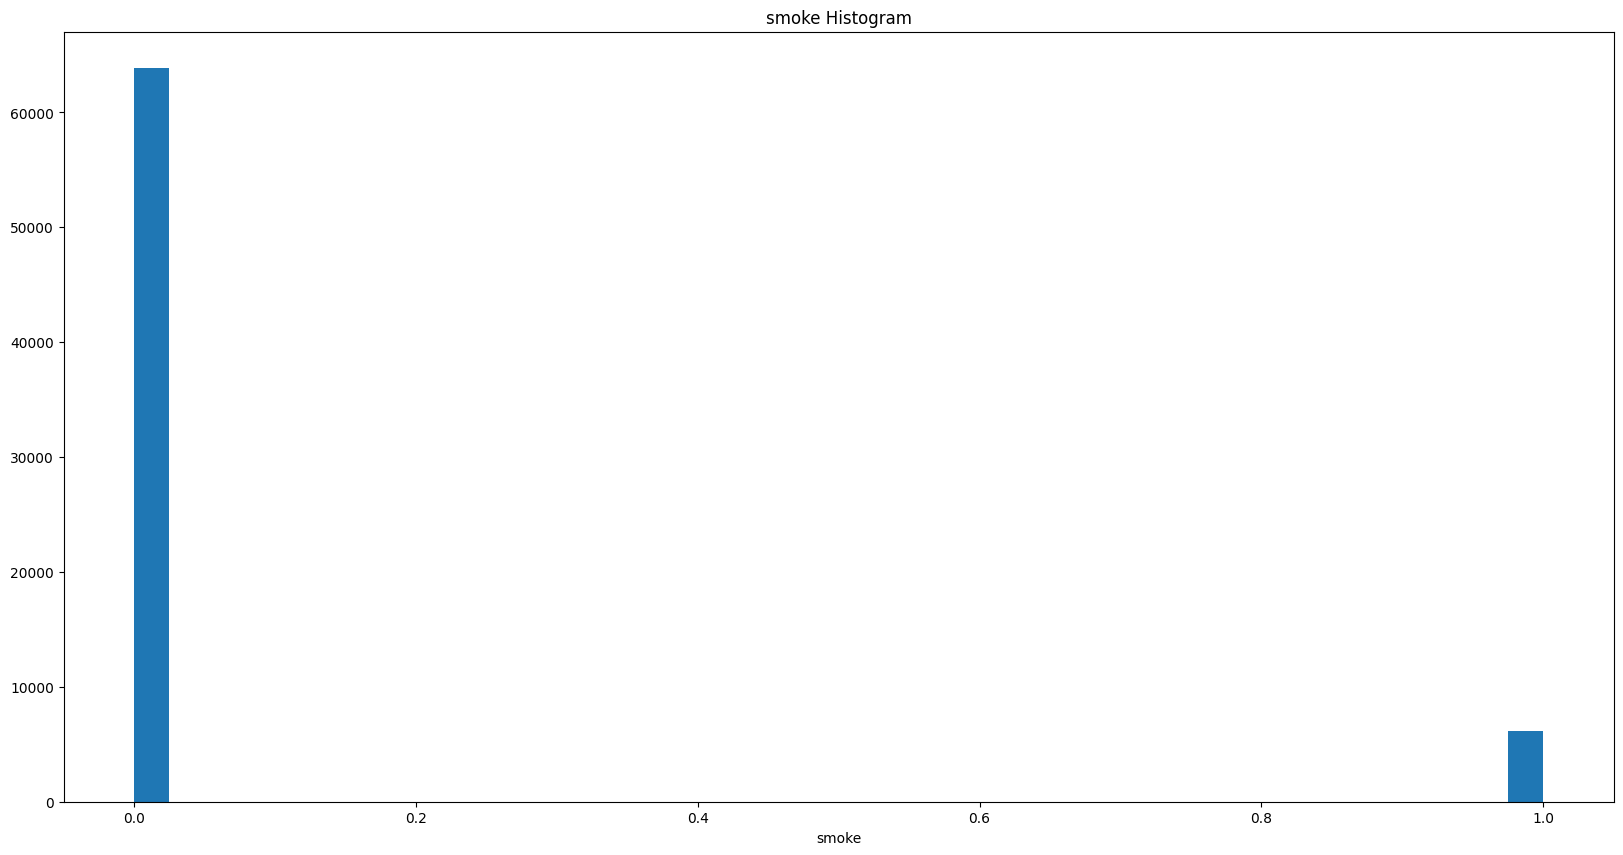

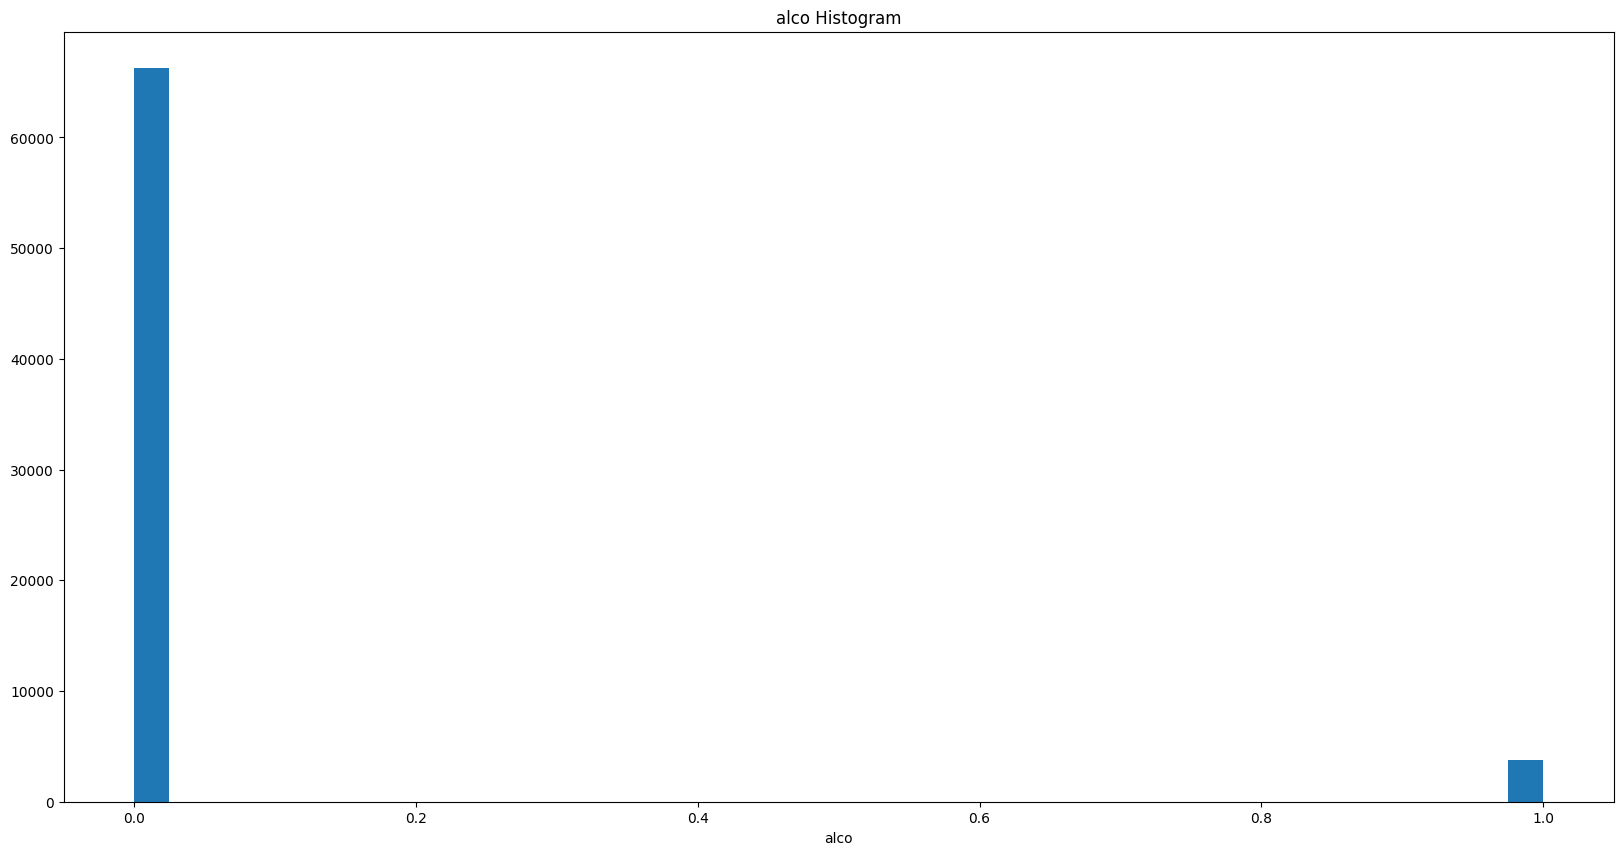

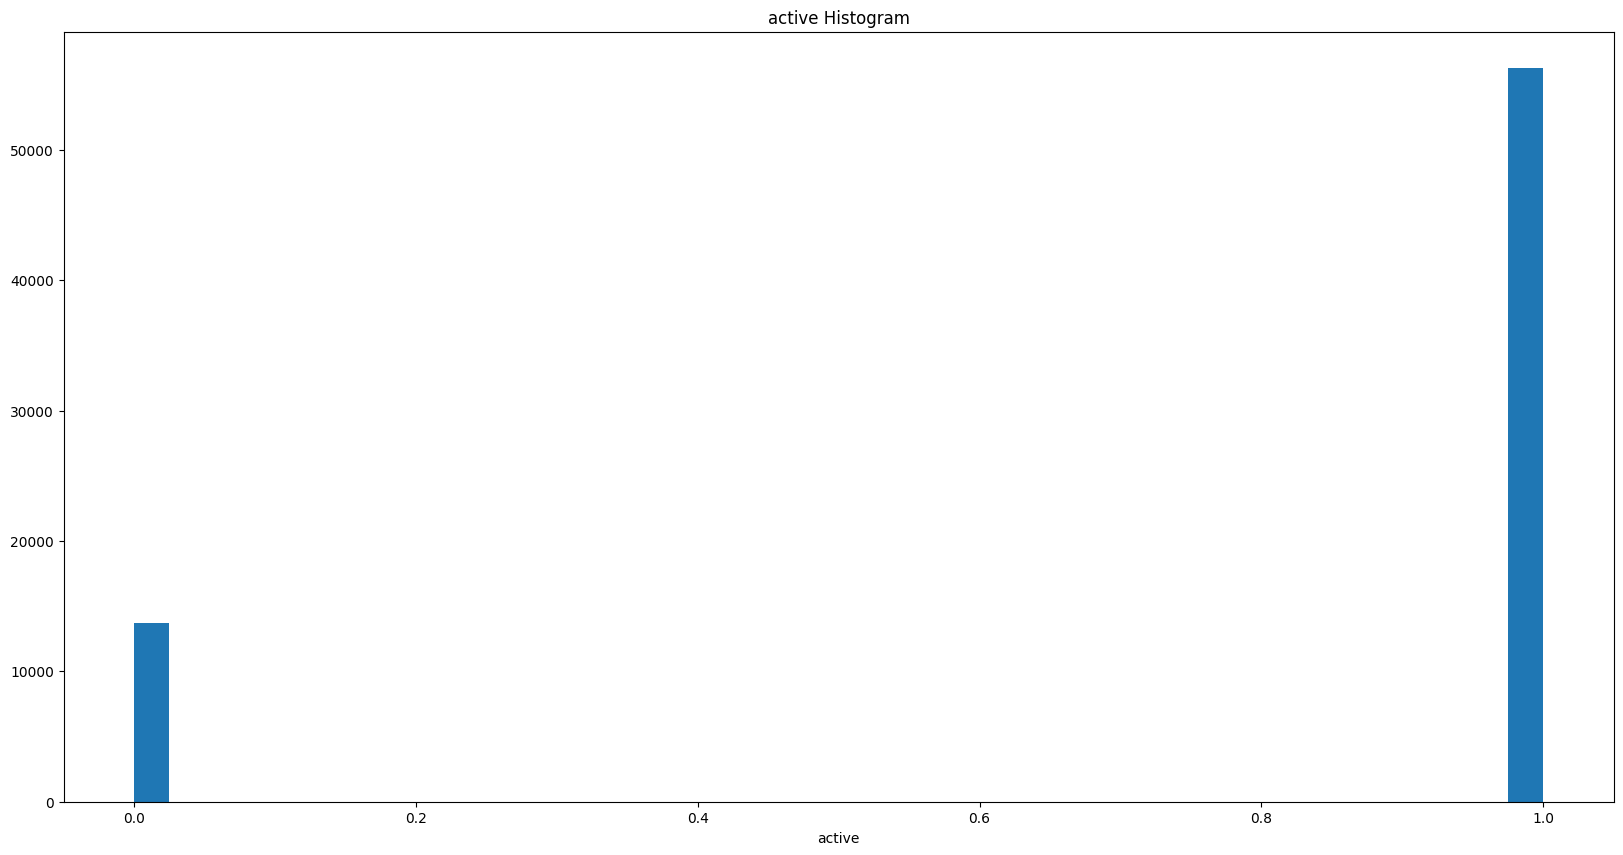

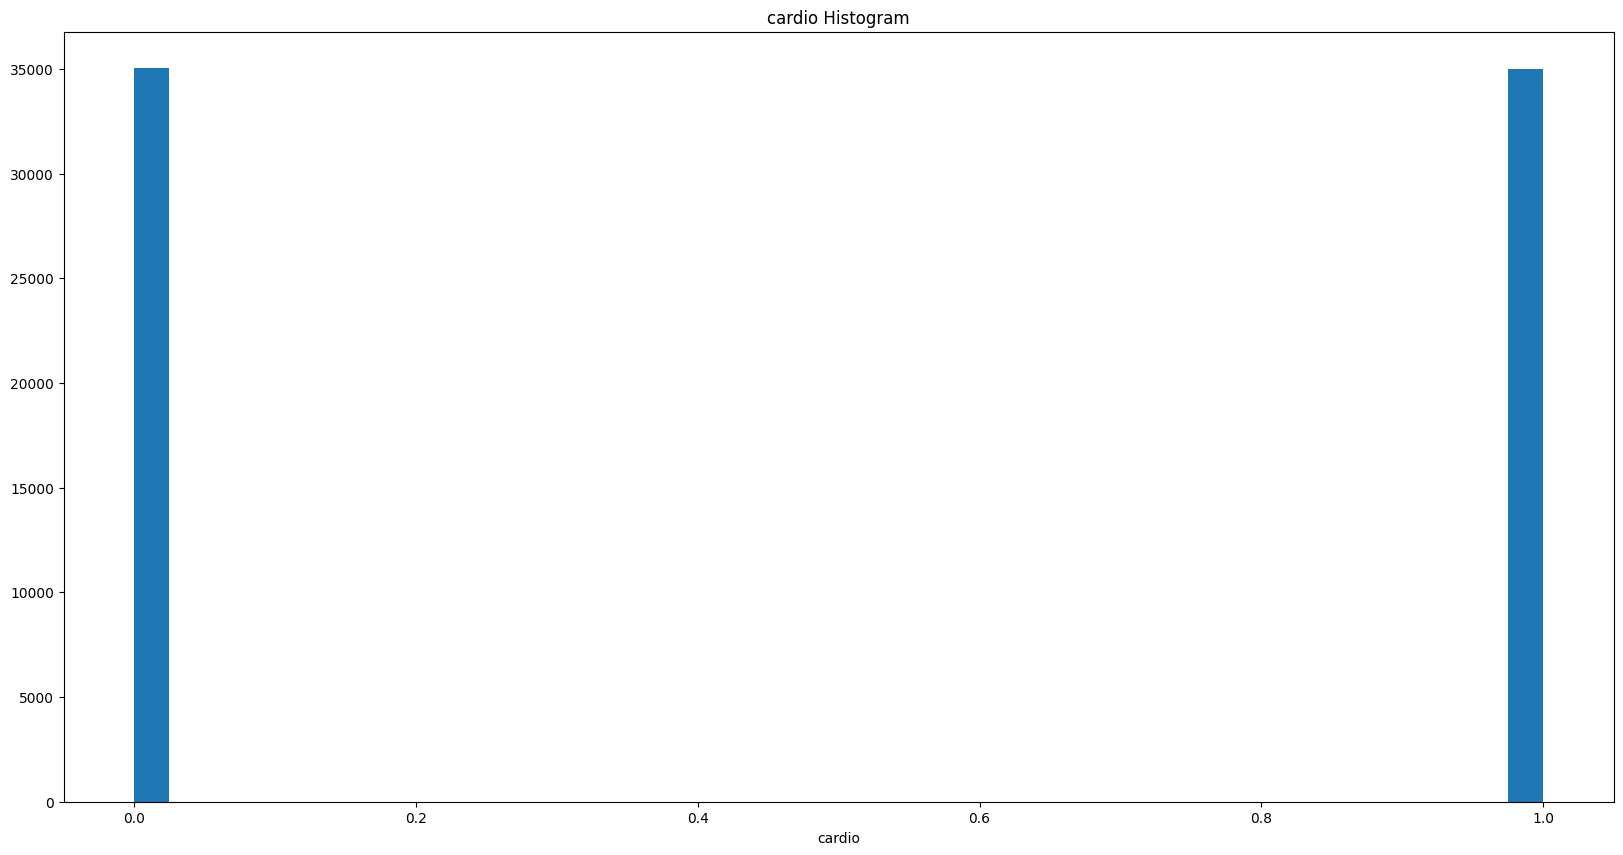

In [6]:
for i in dataset.columns : 

    plt.figure(figsize=(20,10))

    plt.hist(dataset[i], bins=40)
    plt.xlabel(i) 
    plt.title(f"{i} Histogram")
    plt.show()

# PREPROCESSING

In [7]:
dataset.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

# MODELLING

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report , accuracy_score , f1_score , precision_score , recall_score

In [9]:
!pip install lightgbm


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
!pip install xgboost


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
dataset

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [12]:
X = dataset.drop(["id" , "cardio"] , axis=1)
y = dataset["cardio"]


In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size=.25 , random_state=45)

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [15]:
models = {"Logistic": LogisticRegression(), "SVC" : SVC(), "KNeighbors":KNeighborsClassifier(),
          "DecisionTree" : DecisionTreeClassifier(), "RandomForest" : RandomForestClassifier(), "GradientBoosting" : GradientBoostingClassifier(),
          "Gaussian" : GaussianNB(), "Xgb" : XGBClassifier(), "LGBM" : LGBMClassifier()}

In [16]:
def classification(x_train , x_test , y_train , y_test) : 
    name = []
    accuracy = []
    recall = []
    precision = []
    f1 = []

    for i, n in models.items():

        model = n
        model.fit(x_train , y_train)
        pred = model.predict(x_test)

        name.append(i)
        accuracy.append(accuracy_score(pred , y_test))
        recall.append(recall_score(pred , y_test))
        precision.append(precision_score(pred , y_test))
        f1.append(f1_score(pred , y_test))
    
    model_df = pd.DataFrame({"name" : name , "accuracy" : accuracy, "recall" : recall, "precision" : precision, "f1" : f1})

    return model_df


In [17]:
from sklearn.preprocessing import StandardScaler , MinMaxScaler , RobustScaler

## ss

In [18]:
scale = StandardScaler()
X_train_standard = scale.fit_transform(X_train)
X_test_standard = scale.transform(X_test)

In [19]:
model_biasa = classification(X_train , X_test, y_train , y_test)
model_biasa

c:\Users\hanss\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[LightGBM] [Info] Number of positive: 8760, number of negative: 8740
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001033 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 596
[LightGBM] [Info] Number of data points in the train set: 17500, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500571 -> initscore=0.002286
[LightGBM] [Info] Start training from score 0.002286


,name,accuracy,recall,precision,f1
0,Logistic,0.705390,0.722351,0.666120,0.693097
1,SVC,0.599276,0.610493,0.545902,0.576393
2,KNeighbors,0.674743,0.682444,0.652199,0.666979
3,DecisionTree,0.631276,0.632396,0.624967,0.628659
4,RandomForest,0.716514,0.724262,0.698158,0.710970
5,GradientBoosting,0.735124,0.758037,0.689805,0.722313
6,Gaussian,0.594571,0.744112,0.286815,0.414040
7,Xgb,0.726000,0.743960,0.688203,0.714996
8,LGBM,0.733314,0.751192,0.696785,0.722966


In [20]:
model_scale = classification(X_train_standard , X_test_standard , y_train , y_test)
model_scale

[LightGBM] [Info] Number of positive: 8760, number of negative: 8740
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000547 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 601
[LightGBM] [Info] Number of data points in the train set: 17500, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500571 -> initscore=0.002286
[LightGBM] [Info] Start training from score 0.002286


,name,accuracy,recall,precision,f1
0,Logistic,0.724133,0.747011,0.676837,0.710195
1,SVC,0.726971,0.743137,0.692742,0.717055
2,KNeighbors,0.653486,0.660701,0.629353,0.644646
3,DecisionTree,0.629010,0.630024,0.622983,0.626484
4,RandomForest,0.715943,0.723562,0.697815,0.710455
5,GradientBoosting,0.735143,0.758090,0.689767,0.722317
6,Gaussian,0.594362,0.742441,0.287501,0.414495
7,Xgb,0.726000,0.743960,0.688203,0.714996
8,LGBM,0.733143,0.751888,0.694992,0.722321


In [21]:
scaler = RobustScaler()
X_train_robust = scale.fit_transform(X_train)
X_test_robust = scale.transform(X_test)

In [22]:
model_robust = classification(X_train_robust , X_test_robust , y_train , y_test)
model_robust

[LightGBM] [Info] Number of positive: 8760, number of negative: 8740
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000496 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 601
[LightGBM] [Info] Number of data points in the train set: 17500, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500571 -> initscore=0.002286
[LightGBM] [Info] Start training from score 0.002286


,name,accuracy,recall,precision,f1
0,Logistic,0.724133,0.747011,0.676837,0.710195
1,SVC,0.726971,0.743137,0.692742,0.717055
2,KNeighbors,0.653486,0.660701,0.629353,0.644646
3,DecisionTree,0.629143,0.631115,0.619513,0.625260
4,RandomForest,0.715943,0.723917,0.697052,0.710230
5,GradientBoosting,0.735181,0.758089,0.689881,0.722379
6,Gaussian,0.594362,0.742441,0.287501,0.414495
7,Xgb,0.726000,0.743960,0.688203,0.714996
8,LGBM,0.733143,0.751888,0.694992,0.722321


In [23]:
scaler = MinMaxScaler()
X_train_minmax = scale.fit_transform(X_train)
X_test_minmax = scale.transform(X_test)

In [24]:
model_minmax = classification(X_train_minmax , X_test_minmax , y_train , y_test)
model_minmax

[LightGBM] [Info] Number of positive: 8760, number of negative: 8740
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001144 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 601
[LightGBM] [Info] Number of data points in the train set: 17500, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500571 -> initscore=0.002286
[LightGBM] [Info] Start training from score 0.002286


,name,accuracy,recall,precision,f1
0,Logistic,0.724133,0.747011,0.676837,0.710195
1,SVC,0.726971,0.743137,0.692742,0.717055
2,KNeighbors,0.653486,0.660701,0.629353,0.644646
3,DecisionTree,0.631143,0.632194,0.625081,0.628617
4,RandomForest,0.717162,0.725273,0.698082,0.711418
5,GradientBoosting,0.735105,0.758048,0.689729,0.722277
6,Gaussian,0.594362,0.742441,0.287501,0.414495
7,Xgb,0.726000,0.743960,0.688203,0.714996
8,LGBM,0.733143,0.751888,0.694992,0.722321


# CONCLUSION

Model terbaik adalah Gradient Boost dengan standart Scaler

# GRADIENT BOOST HYPERTUNING

In [25]:
X = dataset.drop(["id" , "cardio"] , axis=1)
y = dataset["cardio"]

In [26]:
X_train , X_test , y_train , y_test = train_test_split(X,y , train_size=.25 , random_state=45)

In [27]:
scale = StandardScaler()
X_train_standard = scale.fit_transform(X_train)
X_test_standard = scale.transform(X_test)

In [28]:
model = GradientBoostingClassifier()
model.fit(X_test_standard , y_test)
pred = model.predict(X_test_standard)
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

           0       0.78      0.72      0.75     28319
           1       0.70      0.76      0.73     24181

    accuracy                           0.74     52500
   macro avg       0.74      0.74      0.74     52500
weighted avg       0.74      0.74      0.74     52500



In [29]:
from sklearn.metrics import confusion_matrix

confusion_matrix(pred, y_test)

array([[20499,  7820],
       [ 5782, 18399]], dtype=int64)

In [30]:
X_train , X_test , y_train , y_test = train_test_split(X,y , train_size=.25 , random_state=45)

In [31]:
scale = StandardScaler()
X_train_standard = scale.fit_transform(X_train)
X_test_standard = scale.transform(X_test)

In [33]:
from sklearn.model_selection import GridSearchCV , KFold


params = {
    'n_estimators': [100, 200, 300],            # Jumlah pohon dalam model
    'learning_rate': [0.001, 0.01, 0.1],        # Rate pembelajaran
    'max_depth': [3, 5, 7],                     # Kedalaman maksimum setiap pohon
    'min_samples_split': [2, 5, 10],            # Minimum sampel untuk split node
    'min_samples_leaf': [1, 2, 4],              # Minimum sampel untuk setiap leaf node
    'subsample': [0.8, 0.9, 1.0],               # Proporsi sampel yang digunakan di setiap pohon
    'max_features': ['auto', 'sqrt', 'log2'],    # Jumlah fitur yang digunakan untuk split
    'criterion': ['friedman_mse', 'squared_error']  # Fungsi split yang digunakan
}

kf = KFold(n_splits=3 , shuffle=True , random_state=99)


model_cv = GridSearchCV(estimator=model , cv=kf , param_grid=params)
model_cv.fit(X_train_standard , y_train)

print("best params : " , model_cv.best_params_)
print("best score : " , model_cv.best_score_)

KeyboardInterrupt: 

In [ ]:
# best params :  {'criterion': 'friedman_mse', 'learning_rate': 0.01, 'max_depth': 7, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 100, 'subsample': 0.8}
# best score :  0.7310286676257106

In [36]:
scale = StandardScaler()
X_train_standard = scale.fit_transform(X_train)
X_test_standard = scale.transform(X_test)

In [38]:
params = {'criterion': 'friedman_mse', 'learning_rate': 0.01, 'max_depth': 7, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 100, 'subsample': 0.8}

model = GradientBoostingClassifier(**params)
model.fit(X_train_standard , y_train)
pred = model.predict(X_test_standard)
    

In [ ]:
import pickle
filename = 'FINAL_MODEL_CARDIO.pkl'
pickle.dump(model, open(filename, 'wb'))